<a href="https://colab.research.google.com/github/AndrzejTM/HelloWeb.io/blob/master/matplotlib_zadania.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import matplotlib.pyplot as plt
from math import floor, ceil
import pandas as pd
import random

from google.colab import files
uploaded = files.upload()

Saving dane.csv to dane (5).csv


['0k', '2k', '11k', '20k', '22k']
0 22 11.0


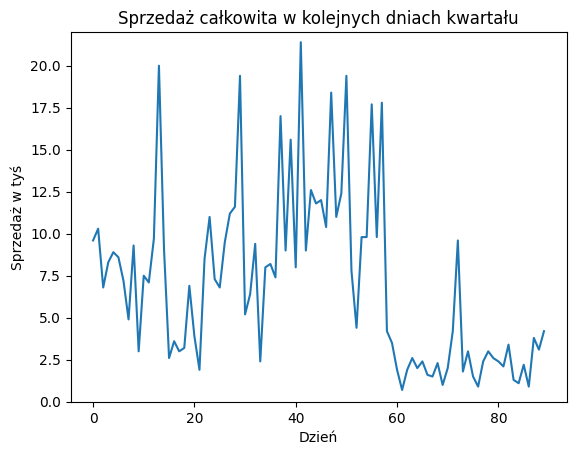

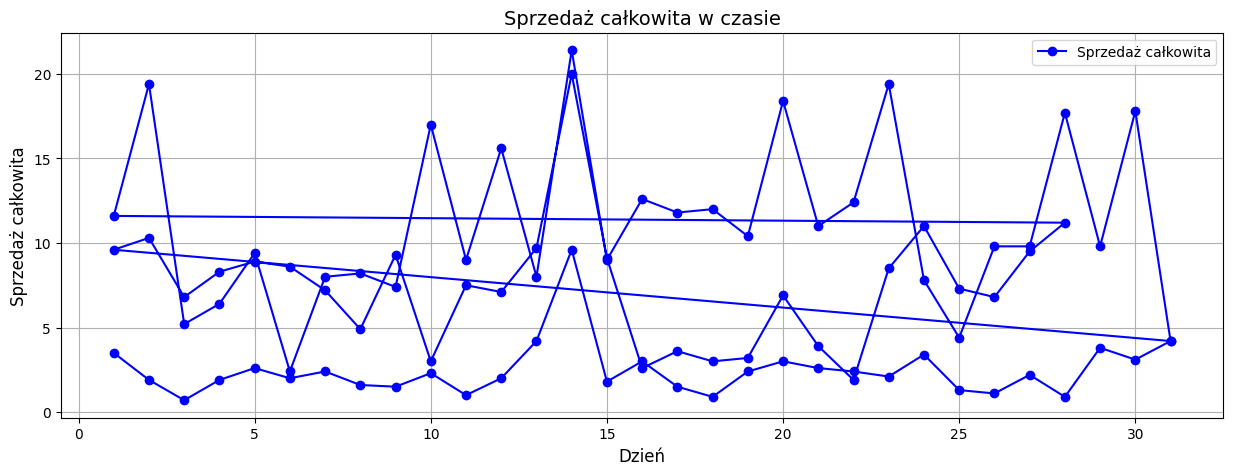

In [44]:
s_min = floor(sprzedaz['Sprzedaz całkowita'].min())
s_max = ceil(sprzedaz['Sprzedaz całkowita'].max())
s_half = s_min + (s_max + s_min) / 2

skala = [s_min, s_min+2, s_half, s_max-2, s_max]
s_etykiety = [f'{int(t)}k' for t in skala]
print(s_etykiety)

print(s_min, s_max, s_half)

dane = pd.read_csv('dane.csv', sep=';', decimal=',', index_col=0)

dane['Sprzedaz całkowita'] = dane['prodA'] + dane['prodB']


sprzedaz = dane.drop(['prodA', 'prodB'], axis=1)


sprzedaz['mies_cat'] = pd.Categorical(sprzedaz.Miesiac,
                                      categories=["styczen", "luty", "marzec"],
                                      ordered=True)

sprzedaz['Sprzedaz całkowita'].plot(xlabel = "Dzień", ylabel="Sprzedaż w tyś", title = "Sprzedaż całkowita w kolejnych dniach kwartału", ylim = (skala[0], skala[-1]))




sprzedaz.sort_values(['mies_cat', 'dzien'], inplace=True, ignore_index=True)

fig, ax = plt.subplots(figsize=[15, 5])

plt.plot(sprzedaz['dzien'], sprzedaz['Sprzedaz całkowita'], marker='o', color='b', label='Sprzedaż całkowita')

plt.title('Sprzedaż całkowita w czasie', fontsize=14)
plt.xlabel('Dzień', fontsize=12)
plt.ylabel('Sprzedaż całkowita', fontsize=12)
plt.grid(True)
plt.legend()


plt.show()



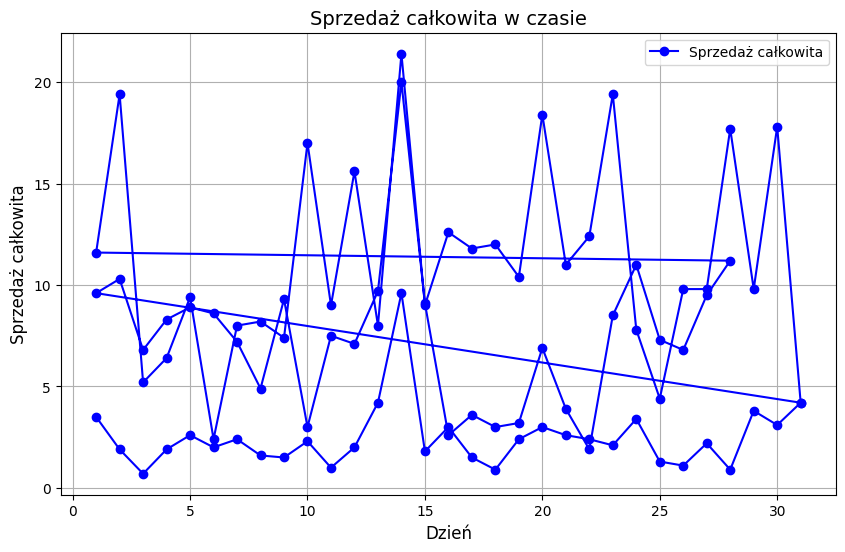

In [35]:
dane = pd.read_csv('dane.csv', sep=';', decimal=',', index_col=0)

dane['Sprzedaz całkowita'] = dane['prodA'] + dane['prodB']


sprzedaz = dane.drop(['prodA', 'prodB'], axis=1)


sprzedaz['mies_cat'] = pd.Categorical(sprzedaz.Miesiac,
                                      categories=["styczen", "luty", "marzec"],
                                      ordered=True)


sprzedaz.sort_values(['mies_cat', 'dzien'], inplace=True, ignore_index=True)


plt.figure(figsize=(10, 6))

plt.plot(sprzedaz['dzien'], sprzedaz['Sprzedaz całkowita'], marker='o', color='b', label='Sprzedaż całkowita')

plt.title('Sprzedaż całkowita w czasie', fontsize=14)
plt.xlabel('Dzień', fontsize=12)
plt.ylabel('Sprzedaż całkowita', fontsize=12)
plt.grid(True)
plt.legend()


plt.show()




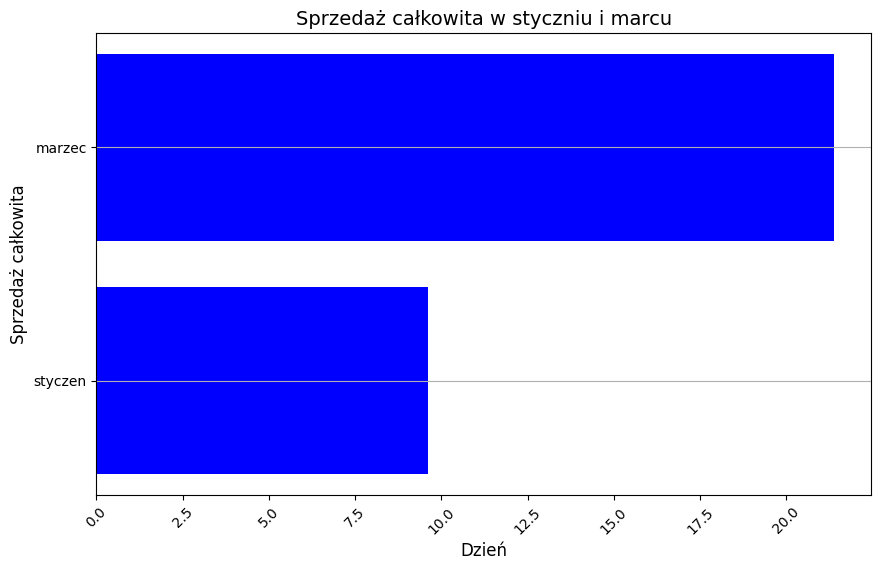

In [27]:
sprzedaz_filtered = sprzedaz[sprzedaz['mies_cat'].isin(['styczen', 'marzec'])]

plt.figure(figsize=(10, 6))

plt.barh(sprzedaz_filtered['mies_cat'], sprzedaz_filtered['Sprzedaz całkowita'], color='blue')

plt.title('Sprzedaż całkowita w styczniu i marcu', fontsize=14)
plt.xlabel('Dzień', fontsize=12)
plt.ylabel('Sprzedaż całkowita', fontsize=12)
plt.grid(True, axis='y')
plt.xticks(rotation=45)


plt.show()

<ipython-input-28-a43794bac796>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sprzedaz_grouped = sprzedaz_filtered.groupby('mies_cat')['Sprzedaz całkowita'].sum()


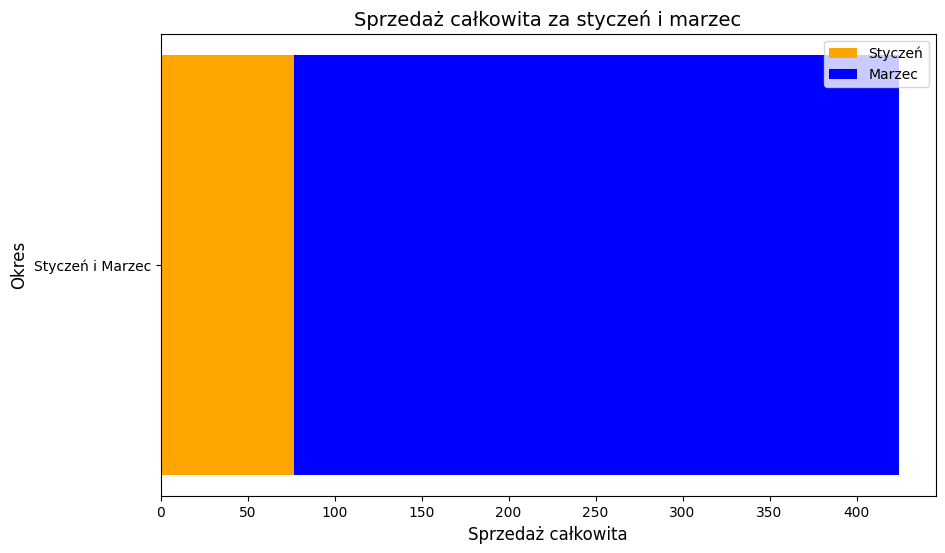

In [28]:
sprzedaz_grouped = sprzedaz_filtered.groupby('mies_cat')['Sprzedaz całkowita'].sum()

sprzedaz_styczen = sprzedaz_grouped.get('styczen', 0)
sprzedaz_marzec = sprzedaz_grouped.get('marzec', 0)

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh('Styczeń i Marzec', sprzedaz_styczen, color='orange', label='Styczeń')  # Słupki dla stycznia
ax.barh('Styczeń i Marzec', sprzedaz_marzec, left=sprzedaz_styczen, color='blue', label='Marzec')  # Słupki dla marca

ax.set_title('Sprzedaż całkowita za styczeń i marzec', fontsize=14)
ax.set_xlabel('Sprzedaż całkowita', fontsize=12)
ax.set_ylabel('Okres', fontsize=12)
ax.legend()

plt.show()